In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(n_samples=500,n_features=1,n_targets=1, noise=75, random_state=40)

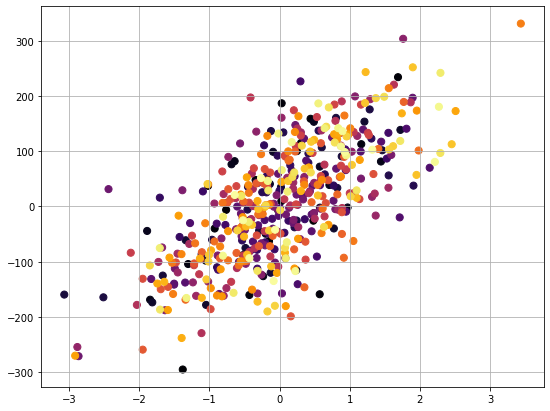

In [3]:
co = np.arange(len(x))

plt.figure(figsize=(9,7))
plt.scatter(x,y,c=co,cmap='inferno',s=50)
plt.grid()

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [6]:
print(f"Slope => {model.coef_}, Intercept => {model.intercept_}")

Slope => [77.13612666], Intercept => 4.335947263280729


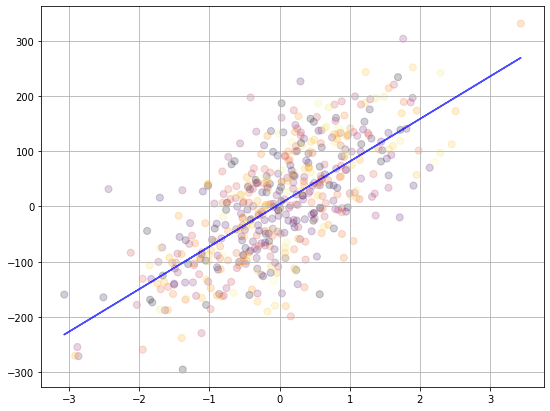

In [7]:
plt.figure(figsize=(9,7))
plt.scatter(x,y,c=co,cmap='inferno',s=50,alpha=0.2)
plt.plot(x, model.predict(x),c='blue',alpha=0.7)
plt.grid()

### Now that we know what the actual values should be lets write the GD

Slope => 77.13612665998596, Intercept => 4.335947263280731


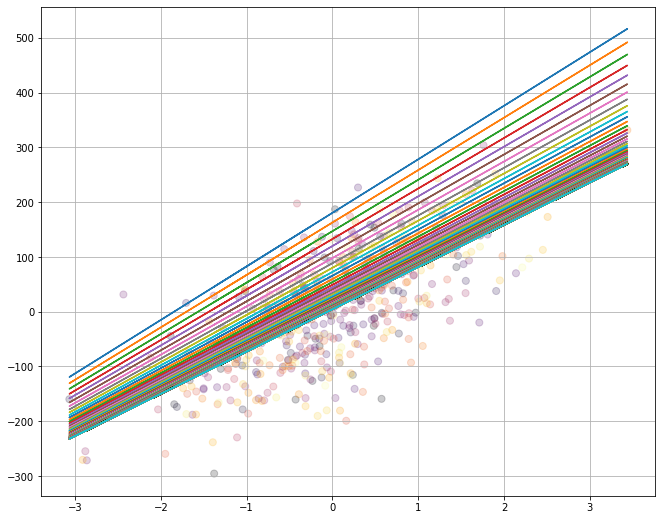

In [8]:
# Choosing arbitary values for m and b
m = 100
b = 200

epochs = 500
lr = 0.0001

plt.figure(figsize=(11,9))
plt.scatter(x,y,c=co,cmap='inferno',s=50,alpha=0.2)
plt.grid()

for i in range(epochs):
    loss_slope_b = -2 * np.sum(y - m * x.ravel() - b)
    loss_slope_m = -2 * np.sum((y - m * x.ravel() - b)*x.ravel())

    b = b - (lr * loss_slope_b)
    m = m - (lr * loss_slope_m)
    
    y_pred = m * x + b
    
    plt.plot(x, y_pred)
#     print(m,b)

print(f"Slope => {m}, Intercept => {b}")

In [9]:
# Choosing arbitary values for m and b
m = 500
b = 500

epochs = 100
lr = 0.0001

all_b = []
all_m = []
all_cost = []


for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(x.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * x[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * x[j]) -  b)*x[j]
        cost = cost + (y[j] - m * x[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

print(f"Slope => {m}, Intercept => {b}")

Slope => [77.16087876], Intercept => [4.34761485]


<IPython.core.display.Javascript object>


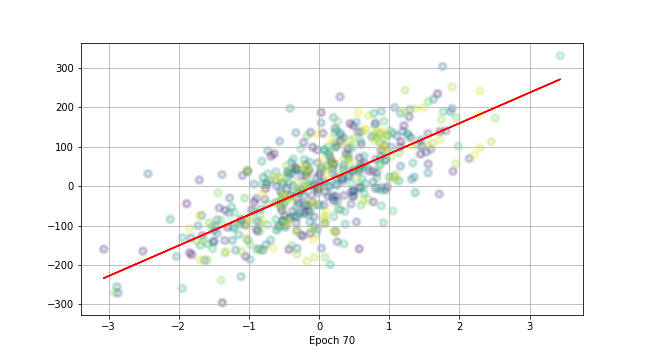

In [10]:
%matplotlib notebook
import numpy as np
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(9,5))
x_i = x
y_i = x_i * (-27) - 150
plt.scatter(x,y,c=co,cmap='viridis',s=50,alpha=0.2,linewidths=3)
plt.grid()
line, = ax.plot(x,y_i,c='red')

def update(i):
    label = f"Epoch {i+1}"
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

anim = FuncAnimation(fig, update, frames=epochs,interval=50)

In [11]:
import matplotlib.animation as animation

In [12]:
ani_1 = r"animation4.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(ani_1, writer=writergif)

## Trying Out Seaborn for GD animation

In [38]:
import seaborn as sns
import pandas as pd

In [48]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df.shape

(150, 5)

In [62]:
%matplotlib inline

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


m_arr = np.linspace(-150, 550, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [63]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")